# 1- Importing Libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2- Loading Data And Initial Check

In [61]:
df = pd.read_csv('large_store_sales.csv')

In [62]:
df.head()

,Date,CustomerID,Product,Quantity,Price
0,2023-04-13,C0402,Phone,3,1718.34
1,2023-12-15,C0606,Camera,1,1545.59
2,2023-09-28,C0229,Monitor,5,1846.37
3,2023-04-17,C0537,Laptop,4,193.12
4,2023-03-13,C0268,Camera,1,195.23


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        10000 non-null  object 
 1   CustomerID  10000 non-null  object 
 2   Product     10000 non-null  object 
 3   Quantity    10000 non-null  int64  
 4   Price       10000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [64]:
df.describe()

,Quantity,Price
count,10000.000000,10000.000000
mean,3.039000,1545.090981
std,1.423545,836.191175
min,1.000000,100.020000
25%,2.000000,816.402500
50%,3.000000,1550.960000
75%,4.000000,2265.417500
max,5.000000,2999.390000


# 3- Preprocessing Data

In [65]:
# Changing "Date" format to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [66]:
# Memory Usage Reduction For "Quantity" and "Price"
df["Quantity"] = df["Quantity"].astype("uint8")

df["Price"] = df["Price"].astype("float32")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        10000 non-null  datetime64[ns]
 1   CustomerID  10000 non-null  object        
 2   Product     10000 non-null  object        
 3   Quantity    10000 non-null  uint8         
 4   Price       10000 non-null  float32       
dtypes: datetime64[ns](1), float32(1), object(2), uint8(1)
memory usage: 283.3+ KB


In [67]:
# Add Total Price
df["Total"] = df["Quantity"] * df["Price"]
df["Total"] = df["Total"].astype("float32")

In [68]:
# Add Month
df["Month"] = df["Date"].dt.month
df["Month"] = df["Month"].astype("uint8")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        10000 non-null  datetime64[ns]
 1   CustomerID  10000 non-null  object        
 2   Product     10000 non-null  object        
 3   Quantity    10000 non-null  uint8         
 4   Price       10000 non-null  float32       
 5   Total       10000 non-null  float32       
 6   Month       10000 non-null  uint8         
dtypes: datetime64[ns](1), float32(2), object(2), uint8(2)
memory usage: 332.2+ KB


# 4- Initial Analysis

In [69]:
# Total Sale Of Each Product
product_sale = df.groupby("Product")["Total"].sum()
product_sale.sort_values(ascending=False, inplace=True)
product_sale

Product
Monitor    8087398.0
Tablet     8011582.5
Phone      7848142.5
Camera     7826121.5
Printer    7644930.5
Laptop     7541670.0
Name: Total, dtype: float32

In [70]:
# Total Sale In Every Month
month_sale = df.groupby("Month")["Total"].sum()
month_sale.sort_values(ascending=False, inplace=True)
month_sale

Month
7     4149552.50
4     4114146.25
1     4059818.25
11    4041805.75
3     4004813.25
5     4003173.00
8     3996552.00
6     3928739.75
10    3805844.75
12    3801750.75
9     3561006.25
2     3492642.50
Name: Total, dtype: float32

In [71]:
# Top 10 Customer With Most Purchase
top_customers = df.groupby("CustomerID")["Total"].sum()
top_customers.sort_values(ascending=False, inplace=True)
top_customers[:10]

CustomerID
C0783    97795.734375
C0095    90550.960938
C0450    86353.640625
C1297    82846.015625
C0762    82205.093750
C1101    81056.210938
C1487    79161.875000
C0434    75054.023438
C0601    75046.640625
C0984    75029.968750
Name: Total, dtype: float32

# 5- Visualization

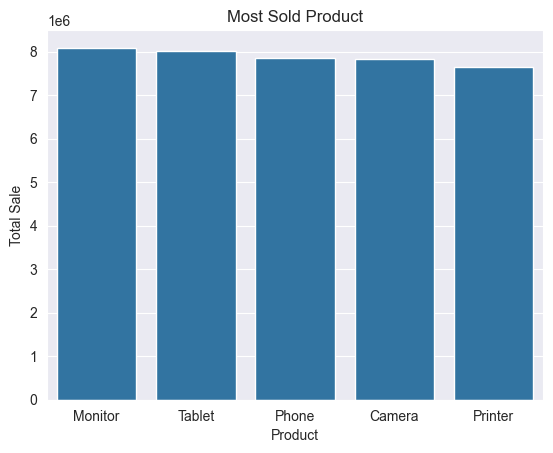

In [72]:
# Top 5 of Most Sold Product
sns.barplot(product_sale[:5])
plt.title("Most Sold Product")
plt.ylabel("Total Sale")
plt.show()

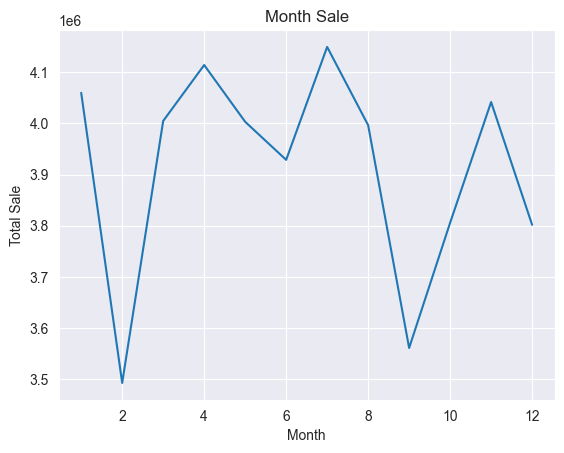

In [73]:
# Month Sale Plot
sns.lineplot(month_sale)
plt.title("Month Sale")
plt.ylabel("Total Sale")
plt.show()

<Axes: >

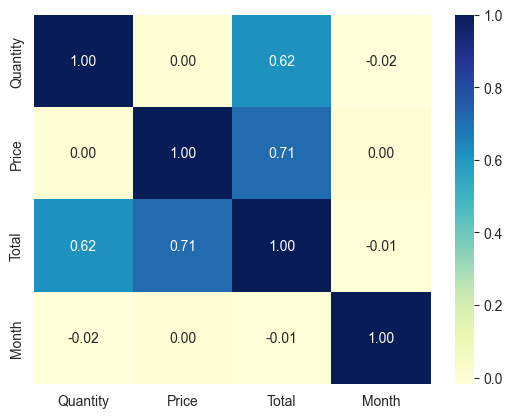

In [74]:
# Correlations heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")

# 6- Advanced Analysis

In [94]:
# Price Status For Each Product
price_bonds = df.groupby("Product")["Price"].quantile([0.25, 0.75]).unstack()
price_bonds.columns = ["Q1", "Q3"]

df_copy = df.merge(price_bonds, on="Product", how="left")


def price_status(rec):
    if rec["Price"] > rec["Q3"]:
        return "High"
    elif rec["Price"] < rec["Q1"]:
        return "Low"
    else:
        return "Normal"


df["PriceStatus"] = df_copy.apply(price_status, axis=1)

df.head()

,Date,CustomerID,Product,Quantity,Price,Total,Month,PriceStatus
0,2023-04-13,C0402,Phone,3,1718.339966,5155.020020,4,Normal
1,2023-12-15,C0606,Camera,1,1545.589966,1545.589966,12,Normal
2,2023-09-28,C0229,Monitor,5,1846.369995,9231.849609,9,Normal
3,2023-04-17,C0537,Laptop,4,193.119995,772.479980,4,Low
4,2023-03-13,C0268,Camera,1,195.229996,195.229996,3,Low


In [102]:
# Customers With More Than 10 Purchases
pur_count = df.groupby("CustomerID")["Quantity"].sum()
pur_count.sort_values(ascending=False, inplace=True)
pur_count[pur_count > 10]

CustomerID
C0599    48
C1170    48
C1101    47
C1301    47
C1480    46
         ..
C0216    11
C0237    11
C0394    11
C1011    11
C0070    11
Name: Quantity, Length: 1333, dtype: uint8